In [56]:
import pandas as pd
import keras
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC 
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
df.strength.value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

# Preprocessing

In [16]:
df = df.astype(str)

In [17]:
df['pass_length'] = df['password'].str.len()
df['digits_count'] = df['password'].apply(lambda x: len([item for item in list(x) if item.isdigit()]))
df['alpha_count'] = df['password'].apply(lambda x: len([item for item in list(x) if item.isalpha()]))
df['vowel_count'] = df['password'].apply(lambda x: len([item for item in list(x) if item in ['a','o', 'e', 'i','u']]))
df['consonant_count'] = df['password'].apply(lambda x: len([item for item in list(x) if item not in ['a','o', 'e', 'i','u']]))

In [57]:
df

,password,strength,pass_length,digits_count,alpha_count,vowel_count,consonant_count
0,kzde5577,1,8,4,4,1,7
1,kino3434,1,8,4,4,2,6
2,visi7k1yr,1,9,2,7,2,7
3,megzy123,1,8,3,5,1,7
4,lamborghin1,1,11,1,10,3,8
...,...,...,...,...,...,...,...
669635,10redtux10,1,10,4,6,2,8
669636,infrared1,1,9,1,8,3,6
669637,184520socram,1,12,6,6,2,10
669638,marken22a,1,9,2,7,3,6


In [31]:
X = df.drop(['strength', 'password'], axis=1)
y = df.strength

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((448658, 5), (220982, 5), (448658,), (220982,))

# Support Vector Classifier

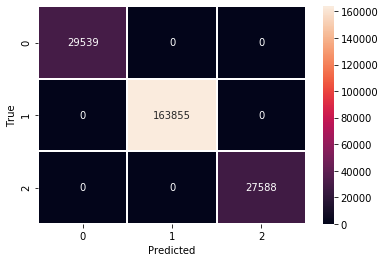

In [45]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1.0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K Nearest Neighbor

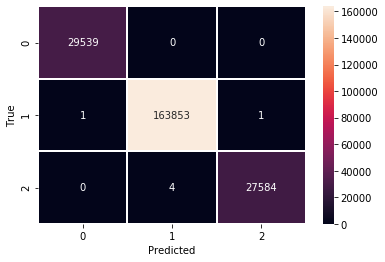

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
  
y_pred = knn.predict(X_test)  

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1.0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ANN

In [51]:
X = df.drop(['strength', 'password'], axis=1)
y = np_utils.to_categorical(df.strength)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((448658, 5), (220982, 5), (448658, 3), (220982, 3))

In [52]:
model = Sequential()
model.add(Dense(32, input_dim = X_train.shape[-1], activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                192       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, epochs=200, batch_size = 50, validation_split = 0.3)

Train on 314060 samples, validate on 134598 samples
Epoch 1/200
314060/314060 [==============================] - 11s 35us/step - loss: 0.2437 - accuracy: 0.9159 - val_loss: 0.0364 - val_accuracy: 0.9939
Epoch 2/200
314060/314060 [==============================] - 10s 33us/step - loss: 0.0369 - accuracy: 0.9908 - val_loss: 0.0074 - val_accuracy: 0.9996
Epoch 3/200
314060/314060 [==============================] - 10s 32us/step - loss: 0.0172 - accuracy: 0.9953 - val_loss: 0.0037 - val_accuracy: 0.9998
Epoch 4/200
314060/314060 [==============================] - 11s 36us/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0025 - val_accuracy: 0.9999
Epoch 5/200
314060/314060 [==============================] - 12s 37us/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 8.3631e-04 - val_accuracy: 1.0000
Epoch 6/200
314060/314060 [==============================] - 13s 40us/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 9.8193e-04 - val_accuracy: 1.0000
Epoch 7/200
314060/314060 [=======

314060/314060 [==============================] - 13s 42us/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 54/200
314060/314060 [==============================] - 15s 48us/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 8.4506e-04 - val_accuracy: 1.0000
Epoch 55/200
314060/314060 [==============================] - 12s 38us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 7.1384e-04 - val_accuracy: 1.0000
Epoch 56/200
314060/314060 [==============================] - 11s 36us/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 3.6874e-04 - val_accuracy: 1.0000
Epoch 57/200
314060/314060 [==============================] - 11s 34us/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 3.3031e-06 - val_accuracy: 1.0000
Epoch 58/200
314060/314060 [==============================] - 10s 33us/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 2.1768e-04 - val_accuracy: 1.0000
Epoch 59/200
314060/314060 [==============================] - 11s 35us/step - los

314060/314060 [==============================] - 9s 30us/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 3.7102e-05 - val_accuracy: 1.0000
Epoch 106/200
314060/314060 [==============================] - 9s 30us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 2.9413e-05 - val_accuracy: 1.0000
Epoch 107/200
314060/314060 [==============================] - 10s 31us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 1.4139e-04 - val_accuracy: 1.0000
Epoch 108/200
314060/314060 [==============================] - 10s 31us/step - loss: 7.6853e-04 - accuracy: 0.9998 - val_loss: 1.7435e-05 - val_accuracy: 1.0000
Epoch 109/200
314060/314060 [==============================] - 10s 31us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 1.1149e-04 - val_accuracy: 1.0000
Epoch 110/200
314060/314060 [==============================] - 10s 31us/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.7306e-04 - val_accuracy: 1.0000
Epoch 111/200
314060/314060 [==============================] - 10s 30u

Epoch 155/200
314060/314060 [==============================] - 7s 21us/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 1.2086e-04 - val_accuracy: 1.0000
Epoch 156/200
314060/314060 [==============================] - 7s 21us/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 2.6411e-05 - val_accuracy: 1.0000 - accuracy: 0. - E
Epoch 157/200
314060/314060 [==============================] - 7s 21us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 5.9710e-06 - val_accuracy: 1.0000
Epoch 158/200
314060/314060 [==============================] - 8s 26us/step - loss: 7.5590e-04 - accuracy: 0.9999 - val_loss: 1.6881e-05 - val_accuracy: 1.0000
Epoch 159/200
314060/314060 [==============================] - 7s 22us/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 5.4651e-04 - val_accuracy: 0.9998ETA: 5s - loss: 6.2954e - ETA: 4s - loss: 2.5043e-04 -  - ETA - ETA: 2s - loss: 6.8822e-04 -  - ETA: 2s - loss: 0.0010 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accura - ETA: 1s - loss: 0.001 - ET

314060/314060 [==============================] - 9s 28us/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 2.0410e-05 - val_accuracy: 1.0000
Epoch 200/200
314060/314060 [==============================] - 10s 32us/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 4.5827e-05 - val_accuracy: 1.0000


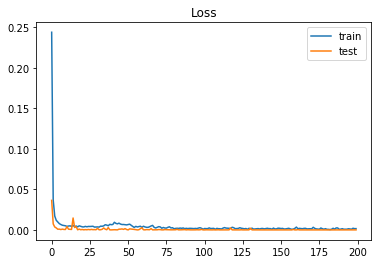

In [54]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()